In [1]:
import pandas as pd

In [16]:
state_wise_daily = pd.read_csv('state_wise_daily.csv')

In [14]:
dates_actual = [date.replace('-', '_') for date in state_wise_daily["Date"].unique()]

In [4]:
state_wise_daily['Daily_Status'] = state_wise_daily["Status"] + "-" + state_wise_daily["Date"]

In [5]:
del state_wise_daily['Date']
del state_wise_daily['Status']
del state_wise_daily['UN']

In [8]:
state_wise_daily['Daily_Status'] = state_wise_daily['Daily_Status'].apply(replace_hyphen)

In [7]:
def modify(value):
    return "Nucleation" + str(value)

def modify_ratios(value):
    return "Ratios" + str(value)

def modify_recovered(value):
    return "Recovered" + str(value)

def modify_deceased(value):
    return "Deceased" + str(value)

def modify_daily(value):
    return "DN" + str(value)

def replace_hyphen(value):
    return str(value).replace('-','_')

def cumulative(df):
    for column in df.columns:
        df[column] = df[column].cumsum()

    return df

def daily(df):
    for column in df.columns:
        temp = df[column].sub(df[column].shift())
        temp.iloc[0] = df[column].iloc[0]
        df[column] = temp
    return df

def get_ST_NM(state):
    '''
    Returns ST_NM (state name) of the argument(which is a feature)
    Used in sorting the list of features in the GeoJSON file
    based on ST_NM(state_name) of the feature.
    '''
    return state["properties"]["ST_NM"]

def statename(statecode):
    '''
    Returns state name from state code
    '''
    if statecode == "AP":
        return "Andhra Pradesh"
    elif statecode == "AN":
        return "Andaman and Nicobar Islands"
    elif statecode == "AR":
        return "Arunachal Pradesh"
    elif statecode == "AS":
        return "Assam"
    elif statecode == "BR":
        return "Bihar"
    elif statecode == "CH":
        return "Chandigarh"
    elif statecode == "CT":
        return "Chhattisgarh"
    elif statecode == "DD":
        return "Dadra and Nagar Haveli and Daman and Diu"
    elif statecode == "DL":
        return "Delhi"
    elif statecode == "GA":
        return "Goa"
    elif statecode == "GJ":
        return "Gujarat"
    elif statecode == "HR":
        return "Haryana"
    elif statecode == "HP":
        return "Himachal Pradesh"
    elif statecode == "JH":
        return "Jharkhand"
    elif statecode == "JK":
        return "Jammu and Kashmir"
    elif statecode == "KA":
        return "Karnataka"
    elif statecode == "KL":
        return "Kerala"
    elif statecode == "LA":
        return "Ladakh"
    elif statecode == "LD":
        return "Lakshadweep"
    elif statecode == "MP":
        return "Madhya Pradesh"
    elif statecode == "MH":
        return "Maharashtra"
    elif statecode == "MN":
        return "Manipur"
    elif statecode == "ML":
        return "Meghalaya"
    elif statecode == "MZ":
        return "Mizoram"
    elif statecode == "NL":
        return "Nagaland"
    elif statecode == "OR":
        return "Odisha"
    elif statecode == "PB":
        return "Punjab"
    elif statecode == "PY":
        return "Puducherry"
    elif statecode == "RJ":
        return "Rajasthan"
    elif statecode == "SK":
        return "Sikkim"
    elif statecode == "TN":
        return "Tamil Nadu"
    elif statecode == "TG":
        return "Telengana"
    elif statecode == "TR":
        return "Tripura"
    elif statecode == "UP":
        return "Uttar Pradesh"
    elif statecode == "UT":
        return "Uttarakhand"
    elif statecode == "WB":
        return "West Bengal"
    else:
        return statecode

In [9]:
state_wise_daily['Daily_Status'] = state_wise_daily['Daily_Status'].apply(replace_hyphen)



# Combine 'Dadra and Nagar Haveli(DN)' and 'Daman and Diu(DD)' to form a single column DD
state_wise_daily["DD"] = state_wise_daily["DD"] + state_wise_daily["DN"]

# Delete DN(Dadra and Nagar Haveli)
del state_wise_daily["DN"]

# Rename column TT as Total
state_wise_daily.rename(columns={"TT" : "Total"}, inplace=True)

# Non-cumulative state-wise daily data
non_cumulative = state_wise_daily.copy()

non_cumulative["Daily_Status"] = non_cumulative["Daily_Status"].apply(modify_ratios)

# A list of elements from Daily_Status
date_status_list = list(state_wise_daily["Daily_Status"]) + list(non_cumulative["Daily_Status"])

# Set the column Daily_Status as the index of the DataFrame
state_wise_daily.set_index("Daily_Status", inplace = True)

non_cumulative.set_index("Daily_Status", inplace = True)

In [17]:
state_wise_daily

,Date,Date_YMD,Status,TT,AN,AP,AR,AS,BR,CH,...,PB,RJ,SK,TN,TG,TR,UP,UT,WB,UN
0,14-Mar-20,2020-03-14,Confirmed,81,0,1,0,0,0,0,...,1,3,0,1,1,0,12,0,0,0
1,14-Mar-20,2020-03-14,Recovered,9,0,0,0,0,0,0,...,0,1,0,0,0,0,4,0,0,0
2,14-Mar-20,2020-03-14,Deceased,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15-Mar-20,2020-03-15,Confirmed,27,0,0,0,0,0,0,...,0,1,0,0,2,0,1,0,0,0
4,15-Mar-20,2020-03-15,Recovered,4,0,0,0,0,0,0,...,0,2,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
805,07-Dec-20,2020-12-07,Recovered,39245,7,595,0,131,679,85,...,886,2664,17,1389,862,42,1861,471,2231,0
806,07-Dec-20,2020-12-07,Deceased,386,0,5,0,2,2,2,...,19,19,2,16,2,1,20,10,48,0
807,08-Dec-20,2020-12-08,Confirmed,32061,5,551,0,94,684,126,...,492,1604,13,1236,682,28,1776,632,2941,0
808,08-Dec-20,2020-12-08,Recovered,36537,16,744,0,102,674,82,...,792,2380,20,1330,761,15,2111,436,2971,0


In [26]:
state_wise_daily['Date'] = state_wise_daily['Date'].str.replace('Sept','Sep')

In [27]:
print(state_wise_daily['Date'].unique())

['14-Mar-20' '15-Mar-20' '16-Mar-20' '17-Mar-20' '18-Mar-20' '19-Mar-20'
 '20-Mar-20' '21-Mar-20' '22-Mar-20' '23-Mar-20' '24-Mar-20' '25-Mar-20'
 '26-Mar-20' '27-Mar-20' '28-Mar-20' '29-Mar-20' '30-Mar-20' '31-Mar-20'
 '01-Apr-20' '02-Apr-20' '03-Apr-20' '04-Apr-20' '05-Apr-20' '06-Apr-20'
 '07-Apr-20' '08-Apr-20' '09-Apr-20' '10-Apr-20' '11-Apr-20' '12-Apr-20'
 '13-Apr-20' '14-Apr-20' '15-Apr-20' '16-Apr-20' '17-Apr-20' '18-Apr-20'
 '19-Apr-20' '20-Apr-20' '21-Apr-20' '22-Apr-20' '23-Apr-20' '24-Apr-20'
 '25-Apr-20' '26-Apr-20' '27-Apr-20' '28-Apr-20' '29-Apr-20' '30-Apr-20'
 '01-May-20' '02-May-20' '03-May-20' '04-May-20' '05-May-20' '06-May-20'
 '07-May-20' '08-May-20' '09-May-20' '10-May-20' '11-May-20' '12-May-20'
 '13-May-20' '14-May-20' '15-May-20' '16-May-20' '17-May-20' '18-May-20'
 '19-May-20' '20-May-20' '21-May-20' '22-May-20' '23-May-20' '24-May-20'
 '25-May-20' '26-May-20' '27-May-20' '28-May-20' '29-May-20' '30-May-20'
 '31-May-20' '01-Jun-20' '02-Jun-20' '03-Jun-20' '0

In [24]:

for column in state_wise_daily.columns[1:]:
    for i in range(1,len(dates_actual)):
        state_wise_daily.loc["Confirmed_"+dates_actual[i], column] += state_wise_daily.loc["Confirmed_"+dates_actual[i-1], column]

for column in state_wise_daily.columns[1:]:
    for i in range(1,len(dates_actual)):
        state_wise_daily.loc["Recovered_"+dates_actual[i], column] += state_wise_daily.loc["Recovered_"+dates_actual[i-1], column]

for column in state_wise_daily.columns[1:]:
    for i in range(1,len(dates_actual)):
        state_wise_daily.loc["Deceased_"+dates_actual[i], column] += state_wise_daily.loc["Deceased_"+dates_actual[i-1], column]

In [25]:
state_wise_daily

,Date_YMD,Total,AN,AP,AR,AS,BR,CH,CT,DD,...,PY,PB,RJ,SK,TN,TG,TR,UP,UT,WB
Daily_Status,,,,,,,,,,,,,,,,,,,,,
Confirmed_14_Mar_20,2020-03-14,81,0,1,0,0,0,0,0,0,...,0,1,3,0,1,1,0,12,0,0
Recovered_14_Mar_20,2020-03-14,9,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,4,0,0
Deceased_14_Mar_20,2020-03-14,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Confirmed_15_Mar_20,2020-03-15,108,0,1,0,0,0,0,0,0,...,0,1,4,0,1,3,0,13,0,0
Recovered_15_Mar_20,2020-03-15,13,0,0,0,0,0,0,0,0,...,0,0,3,0,0,1,0,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Recovered_26_Oct_20,2020-10-26,7198849,3988,773548,12182,188584,202007,13230,153654,3130,...,29990,123047,169962,3449,671489,211912,28046,438512,55188,310086
Deceased_26_Oct_20,2020-10-26,118951,58,6606,35,912,1058,222,1861,2,...,588,4125,1853,65,10956,1311,340,6902,1001,6546
Confirmed_27_Oct_20,2020-10-27,7988376,4270,811825,14472,204687,213383,14152,179654,3224,...,34484,131737,189844,3876,714235,232161,30290,474054,60957,357779


In [32]:
aa = state_wise_daily['KA'][0::3].values

In [34]:
import matplotlib.pyplot as plt

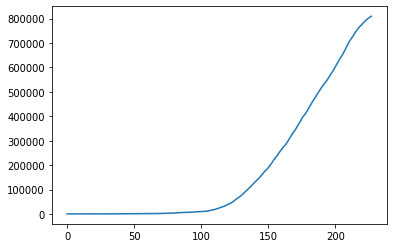

In [35]:
plt.plot(aa)

In [36]:
non_cumulative

,Date_YMD,Total,AN,AP,AR,AS,BR,CH,CT,DD,...,PY,PB,RJ,SK,TN,TG,TR,UP,UT,WB
Daily_Status,,,,,,,,,,,,,,,,,,,,,
RatiosConfirmed_14_Mar_20,2020-03-14,81,0,1,0,0,0,0,0,0,...,0,1,3,0,1,1,0,12,0,0
RatiosRecovered_14_Mar_20,2020-03-14,9,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,4,0,0
RatiosDeceased_14_Mar_20,2020-03-14,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
RatiosConfirmed_15_Mar_20,2020-03-15,27,0,0,0,0,0,0,0,0,...,0,0,1,0,0,2,0,1,0,0
RatiosRecovered_15_Mar_20,2020-03-15,4,0,0,0,0,0,0,0,0,...,0,0,2,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RatiosRecovered_26_Oct_20,2020-10-26,63734,14,3972,231,2832,1087,63,3256,1,...,189,326,2226,5,4014,1432,183,2441,700,3889
RatiosDeceased_26_Oct_20,2020-10-26,485,0,19,2,2,9,4,43,0,...,0,8,14,1,32,4,0,20,8,59
RatiosConfirmed_27_Oct_20,2020-10-27,43034,21,2901,81,403,678,67,2046,1,...,146,346,1796,23,2522,837,36,1986,213,3957


In [37]:
state_wise_daily = pd.concat([state_wise_daily, non_cumulative])

In [38]:
state_wise_daily

,Date_YMD,Total,AN,AP,AR,AS,BR,CH,CT,DD,...,PY,PB,RJ,SK,TN,TG,TR,UP,UT,WB
Daily_Status,,,,,,,,,,,,,,,,,,,,,
Confirmed_14_Mar_20,2020-03-14,81,0,1,0,0,0,0,0,0,...,0,1,3,0,1,1,0,12,0,0
Recovered_14_Mar_20,2020-03-14,9,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,4,0,0
Deceased_14_Mar_20,2020-03-14,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Confirmed_15_Mar_20,2020-03-15,108,0,1,0,0,0,0,0,0,...,0,1,4,0,1,3,0,13,0,0
Recovered_15_Mar_20,2020-03-15,13,0,0,0,0,0,0,0,0,...,0,0,3,0,0,1,0,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RatiosRecovered_26_Oct_20,2020-10-26,63734,14,3972,231,2832,1087,63,3256,1,...,189,326,2226,5,4014,1432,183,2441,700,3889
RatiosDeceased_26_Oct_20,2020-10-26,485,0,19,2,2,9,4,43,0,...,0,8,14,1,32,4,0,20,8,59
RatiosConfirmed_27_Oct_20,2020-10-27,43034,21,2901,81,403,678,67,2046,1,...,146,346,1796,23,2522,837,36,1986,213,3957


In [39]:
for column in state_wise_daily:
    state_wise_daily.rename(columns={column : statename(column)}, inplace=True)

In [40]:
state_wise_daily

,Date_YMD,Total,Andaman and Nicobar Islands,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chandigarh,Chhattisgarh,Dadra and Nagar Haveli and Daman and Diu,...,Puducherry,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telengana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal
Daily_Status,,,,,,,,,,,,,,,,,,,,,
Confirmed_14_Mar_20,2020-03-14,81,0,1,0,0,0,0,0,0,...,0,1,3,0,1,1,0,12,0,0
Recovered_14_Mar_20,2020-03-14,9,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,4,0,0
Deceased_14_Mar_20,2020-03-14,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Confirmed_15_Mar_20,2020-03-15,108,0,1,0,0,0,0,0,0,...,0,1,4,0,1,3,0,13,0,0
Recovered_15_Mar_20,2020-03-15,13,0,0,0,0,0,0,0,0,...,0,0,3,0,0,1,0,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RatiosRecovered_26_Oct_20,2020-10-26,63734,14,3972,231,2832,1087,63,3256,1,...,189,326,2226,5,4014,1432,183,2441,700,3889
RatiosDeceased_26_Oct_20,2020-10-26,485,0,19,2,2,9,4,43,0,...,0,8,14,1,32,4,0,20,8,59
RatiosConfirmed_27_Oct_20,2020-10-27,43034,21,2901,81,403,678,67,2046,1,...,146,346,1796,23,2522,837,36,1986,213,3957


In [41]:
date_status_list

['Confirmed_14_Mar_20',
 'Recovered_14_Mar_20',
 'Deceased_14_Mar_20',
 'Confirmed_15_Mar_20',
 'Recovered_15_Mar_20',
 'Deceased_15_Mar_20',
 'Confirmed_16_Mar_20',
 'Recovered_16_Mar_20',
 'Deceased_16_Mar_20',
 'Confirmed_17_Mar_20',
 'Recovered_17_Mar_20',
 'Deceased_17_Mar_20',
 'Confirmed_18_Mar_20',
 'Recovered_18_Mar_20',
 'Deceased_18_Mar_20',
 'Confirmed_19_Mar_20',
 'Recovered_19_Mar_20',
 'Deceased_19_Mar_20',
 'Confirmed_20_Mar_20',
 'Recovered_20_Mar_20',
 'Deceased_20_Mar_20',
 'Confirmed_21_Mar_20',
 'Recovered_21_Mar_20',
 'Deceased_21_Mar_20',
 'Confirmed_22_Mar_20',
 'Recovered_22_Mar_20',
 'Deceased_22_Mar_20',
 'Confirmed_23_Mar_20',
 'Recovered_23_Mar_20',
 'Deceased_23_Mar_20',
 'Confirmed_24_Mar_20',
 'Recovered_24_Mar_20',
 'Deceased_24_Mar_20',
 'Confirmed_25_Mar_20',
 'Recovered_25_Mar_20',
 'Deceased_25_Mar_20',
 'Confirmed_26_Mar_20',
 'Recovered_26_Mar_20',
 'Deceased_26_Mar_20',
 'Confirmed_27_Mar_20',
 'Recovered_27_Mar_20',
 'Deceased_27_Mar_20',
 'Conf

In [42]:
total_properties_list = [{"name":"Total"}]

for date_status in date_status_list:
    total_properties_list[0][date_status] = str(state_wise_daily.loc[date_status, "Total"])

In [43]:
total_properties_list

[{'name': 'Total',
  'Confirmed_14_Mar_20': '81',
  'Recovered_14_Mar_20': '9',
  'Deceased_14_Mar_20': '2',
  'Confirmed_15_Mar_20': '108',
  'Recovered_15_Mar_20': '13',
  'Deceased_15_Mar_20': '2',
  'Confirmed_16_Mar_20': '123',
  'Recovered_16_Mar_20': '14',
  'Deceased_16_Mar_20': '2',
  'Confirmed_17_Mar_20': '134',
  'Recovered_17_Mar_20': '15',
  'Deceased_17_Mar_20': '3',
  'Confirmed_18_Mar_20': '171',
  'Recovered_18_Mar_20': '15',
  'Deceased_18_Mar_20': '3',
  'Confirmed_19_Mar_20': '198',
  'Recovered_19_Mar_20': '20',
  'Deceased_19_Mar_20': '4',
  'Confirmed_20_Mar_20': '256',
  'Recovered_20_Mar_20': '23',
  'Deceased_20_Mar_20': '4',
  'Confirmed_21_Mar_20': '334',
  'Recovered_21_Mar_20': '23',
  'Deceased_21_Mar_20': '4',
  'Confirmed_22_Mar_20': '401',
  'Recovered_22_Mar_20': '23',
  'Deceased_22_Mar_20': '7',
  'Confirmed_23_Mar_20': '503',
  'Recovered_23_Mar_20': '35',
  'Deceased_23_Mar_20': '9',
  'Confirmed_24_Mar_20': '567',
  'Recovered_24_Mar_20': '40',


In [44]:
del state_wise_daily["Total"]


# List of empty dicts which will be filled with the data from CSV file
# and combined with the GeoJSON data
state_wise_properties_list = [{} for i in range(len(state_wise_daily.columns))]

In [45]:
for i, column in enumerate(state_wise_daily):
    state_wise_properties_list[i]["name"] = column
    for date_status in date_status_list:
        state_wise_properties_list[i][date_status] = str(state_wise_daily.loc[date_status, column])

In [46]:
state_wise_properties_list

[{'name': 'Date_YMD',
  'Confirmed_14_Mar_20': '2020-03-14',
  'Recovered_14_Mar_20': '2020-03-14',
  'Deceased_14_Mar_20': '2020-03-14',
  'Confirmed_15_Mar_20': '2020-03-15',
  'Recovered_15_Mar_20': '2020-03-15',
  'Deceased_15_Mar_20': '2020-03-15',
  'Confirmed_16_Mar_20': '2020-03-16',
  'Recovered_16_Mar_20': '2020-03-16',
  'Deceased_16_Mar_20': '2020-03-16',
  'Confirmed_17_Mar_20': '2020-03-17',
  'Recovered_17_Mar_20': '2020-03-17',
  'Deceased_17_Mar_20': '2020-03-17',
  'Confirmed_18_Mar_20': '2020-03-18',
  'Recovered_18_Mar_20': '2020-03-18',
  'Deceased_18_Mar_20': '2020-03-18',
  'Confirmed_19_Mar_20': '2020-03-19',
  'Recovered_19_Mar_20': '2020-03-19',
  'Deceased_19_Mar_20': '2020-03-19',
  'Confirmed_20_Mar_20': '2020-03-20',
  'Recovered_20_Mar_20': '2020-03-20',
  'Deceased_20_Mar_20': '2020-03-20',
  'Confirmed_21_Mar_20': '2020-03-21',
  'Recovered_21_Mar_20': '2020-03-21',
  'Deceased_21_Mar_20': '2020-03-21',
  'Confirmed_22_Mar_20': '2020-03-22',
  'Recovere

In [49]:
f = open('states_geojson_simplified.json')
loaded_json = json.load(f)

# Sort the list of features based on ST_NM,
# which is state name like 'Arunachal Pradesh', 'Andhra Pradesh' etc.
loaded_json["features"].sort(key=get_ST_NM)

In [48]:
import json

In [50]:
loaded_json

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'geometry': {'type': 'MultiPolygon',
    'coordinates': [[[[93.704904, 7.221366],
       [93.697856, 7.230706],
       [93.696815, 7.227013],
       [93.697706, 7.2218],
       [93.700847, 7.216669],
       [93.699741, 7.213301],
       [93.70142, 7.209427],
       [93.707283, 7.208291],
       [93.709063, 7.215456],
       [93.704904, 7.221366]]],
     [[[93.756144, 7.403748],
       [93.750588, 7.401301],
       [93.751816, 7.398213],
       [93.756599, 7.396609],
       [93.758989, 7.402071],
       [93.756144, 7.403748]]],
     [[[93.682431, 7.401375],
       [93.678171, 7.406897],
       [93.676148, 7.412278],
       [93.670981, 7.409695],
       [93.671406, 7.404379],
       [93.675173, 7.400281],
       [93.682431, 7.401375]]],
     [[[93.837197, 7.240239],
       [93.833362, 7.240519],
       [93.826435, 7.243244],
       [93.820179, 7.237222],
       [93.816489, 7.239369],
       [93.807688, 7.237315],
       [

In [51]:
loaded_json["features"][0]["properties"]

{'ST_NM': 'Andaman & Nicobar'}

In [52]:
state_wise_properties_list[0]

{'name': 'Date_YMD',
 'Confirmed_14_Mar_20': '2020-03-14',
 'Recovered_14_Mar_20': '2020-03-14',
 'Deceased_14_Mar_20': '2020-03-14',
 'Confirmed_15_Mar_20': '2020-03-15',
 'Recovered_15_Mar_20': '2020-03-15',
 'Deceased_15_Mar_20': '2020-03-15',
 'Confirmed_16_Mar_20': '2020-03-16',
 'Recovered_16_Mar_20': '2020-03-16',
 'Deceased_16_Mar_20': '2020-03-16',
 'Confirmed_17_Mar_20': '2020-03-17',
 'Recovered_17_Mar_20': '2020-03-17',
 'Deceased_17_Mar_20': '2020-03-17',
 'Confirmed_18_Mar_20': '2020-03-18',
 'Recovered_18_Mar_20': '2020-03-18',
 'Deceased_18_Mar_20': '2020-03-18',
 'Confirmed_19_Mar_20': '2020-03-19',
 'Recovered_19_Mar_20': '2020-03-19',
 'Deceased_19_Mar_20': '2020-03-19',
 'Confirmed_20_Mar_20': '2020-03-20',
 'Recovered_20_Mar_20': '2020-03-20',
 'Deceased_20_Mar_20': '2020-03-20',
 'Confirmed_21_Mar_20': '2020-03-21',
 'Recovered_21_Mar_20': '2020-03-21',
 'Deceased_21_Mar_20': '2020-03-21',
 'Confirmed_22_Mar_20': '2020-03-22',
 'Recovered_22_Mar_20': '2020-03-22',